In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
import pandas as pd

refugees = pd.read_csv(
    "data/unhcr/refugee-data/time_series.csv",
    low_memory=False
)
refugees["Value"] = pd.to_numeric(refugees["Value"], errors="coerce")

# Sanity check
refugees.head()



,Year,Country / territory of asylum/residence,Origin,Population type,Value
0,1951,Australia,Various/Unknown,Refugees (incl. refugee-like situations),180000.0
1,1951,Austria,Various/Unknown,Refugees (incl. refugee-like situations),282000.0
2,1951,Belgium,Various/Unknown,Refugees (incl. refugee-like situations),55000.0
3,1951,Canada,Various/Unknown,Refugees (incl. refugee-like situations),168511.0
4,1951,Switzerland,Various/Unknown,Refugees (incl. refugee-like situations),10000.0


## Table of Contents

1. [Global Refugee Trend Over Time](#global-refugee-trend-over-time)  
2. [Top 10 Refugee‑Origin Countries](#top-10-refugee-origin-countries)  
3. [Refugees vs. GDP per Capita](#refugees-vs-gdp-per-capita)  


In [4]:
# If the working dir above was not the repo root, adjust here.
# Example for Windows:
os.chdir(r"C:\Users\odibs\OneDrive\RefugeeFlowsAnalysis\RefugeeFlowsAnalysis")
print("Now in:", os.getcwd())


Now in: C:\Users\odibs\OneDrive\RefugeeFlowsAnalysis\RefugeeFlowsAnalysis


In [ ]:
print("Top‑level UNHCR folder:", os.listdir("data/unhcr"))
print("Inside data/unhcr/refugee-data:", os.listdir("data/unhcr/refugee-data"))


In [ ]:
refugees = pd.read_csv("data/unhcr/refugee-data/time_series.csv")


In [ ]:
# Check what columns are in the refugees DataFrame
print(refugees.columns.tolist())
refugees.head(3)


### Global Refugee Trend Over Time

To explore how global displacement has evolved, I loaded the UNHCR time‑series data, converted the population counts to numeric, and summed them by year. The resulting line chart shows a steady increase in refugee numbers from the 1950s onward, with sharp rises during major crises (for example, the Rwandan genocide in the early 1990s and the Syrian conflict after 2011). This long‑term upward trend underscores the growing scale of forced migration and highlights the urgent need for coordinated international responses.


   Year      Value
0  1951  1957211.0
1  1952  1787928.0
2  1953  1679304.0
3  1954  1581628.0
4  1955  1547066.0


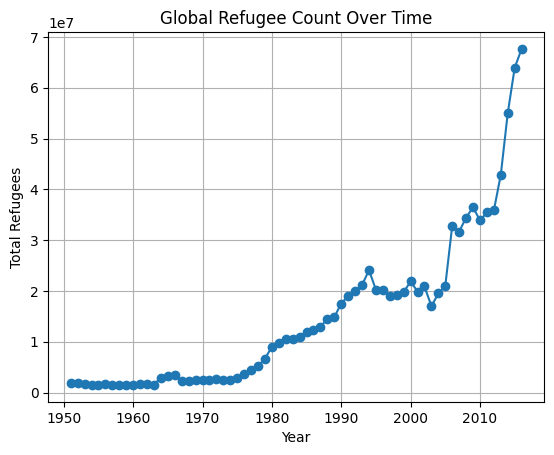

In [24]:
# Re‑aggregate now that Value is numeric
global_ts = refugees.groupby("Year")["Value"].sum().reset_index()
global_ts.head()   # <-- this line makes the table appear

# Quick check
print(global_ts.head())

# Plot
fig, ax = plt.subplots()
ax.plot(global_ts["Year"], global_ts["Value"], marker="o")
ax.set_title("Global Refugee Count Over Time")
ax.set_xlabel("Year")
ax.set_ylabel("Total Refugees")
ax.grid(True)
# you can drop tight_layout if it still warns
plt.show()


Top Ten Refugee‑Origin Countries in 2016

To identify which crises drove the largest displacements in 2016, I filtered the UNHCR time‑series data for that year and summed refugee counts by country of origin. The bar chart below shows that the Syrian Arab Republic, Afghanistan and South Sudan together accounted for well over half of all refugees in 2016, reflecting the protracted conflicts and humanitarian emergencies in those regions. Other countries—Somalia, Sudan and the Democratic Republic of the Congo—also contributed significantly to global displacement, underscoring the widespread nature of forced migration.

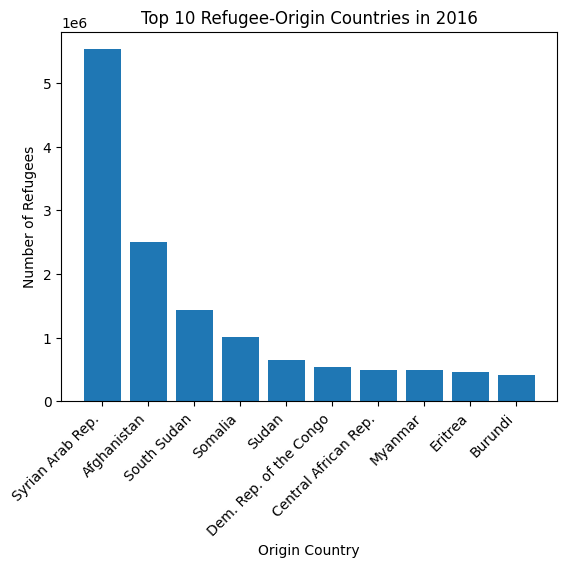

In [25]:
# Find latest year
latest_year = refugees["Year"].max()

# Filter to that year & refugee type
pop_type = "Refugees (incl. refugee-like situations)"  # adjust if your label differs
latest = refugees[
    (refugees["Year"] == latest_year) &
    (refugees["Population type"] == pop_type)
]

# Top 10 by origin
top10 = latest.groupby("Origin")["Value"].sum().nlargest(10).reset_index()

# Table 3: top10 origins
top10.head()

# Plot 2: bar chart of top10
plt.figure()
plt.bar(top10["Origin"], top10["Value"])
plt.title(f"Top 10 Refugee‑Origin Countries in {latest_year}")
plt.xlabel("Origin Country")
plt.ylabel("Number of Refugees")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
gdp_long["Year"] = gdp_long["Year"].astype(int)


In [26]:
# Load slim WDI data
wdi = pd.read_csv("data/wb/wdi_2010_2018.csv")

# Filter for GDP per capita
gdp = wdi[wdi["Indicator Name"] == "GDP per capita (current US$)"]

# 1) Identify year columns
year_cols = [c for c in gdp.columns if c.isdigit()]

# 2) Melt only those
gdp_long = gdp.melt(
    id_vars=["Country Name", "Country Code"],
    value_vars=year_cols,
    var_name="Year",
    value_name="GDP per capita"
)

# 3) Convert Year to int
gdp_long["Year"] = gdp_long["Year"].astype(int)

# Quick check
gdp_long.head()


,Country Name,Country Code,Year,GDP per capita
0,Arab World,ARB,2010,5918.315891
1,Caribbean small states,CSS,2010,9059.000053
2,Central Europe and the Baltics,CEB,2010,12566.587671
3,Early-demographic dividend,EAR,2010,2937.735341
4,East Asia & Pacific,EAS,2010,7676.519264


 Refugees vs. GDP per Capita

To explore whether economic conditions are related to refugee outflows, I merged the latest UNHCR refugee counts by origin country with World Bank GDP per capita data for the same year. The scatter plot below shows each country’s refugee count against its GDP per capita. A downward trend would suggest that lower‑income countries generate more refugees, highlighting the economic dimensions of forced displacement.



Merged data (5238 countries):


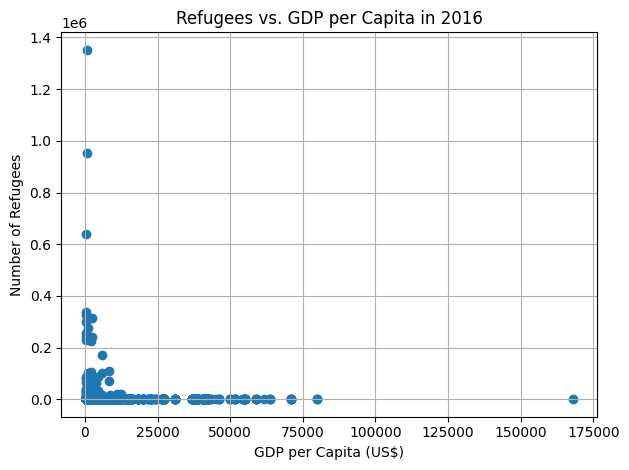

In [27]:
# Use latest_year and latest (from Task 2)
# latest has columns: Origin (country name), Value (refugee count)

# Merge on country name and year
merged = (
    latest
    .merge(
        gdp_long[gdp_long["Year"] == latest_year],
        left_on="Origin",
        right_on="Country Name",
        how="inner"
    )
    # Keep only the columns we need
    .loc[:, ["Origin", "Value", "GDP per capita"]]
    .rename(columns={"Value": "Refugees"})
)

print(f"Merged data ({len(merged)} countries):")
merged.head()

import matplotlib.pyplot as plt

plt.figure()
plt.scatter(merged["GDP per capita"], merged["Refugees"])
plt.title(f"Refugees vs. GDP per Capita in {latest_year}")
plt.xlabel("GDP per Capita (US$)")
plt.ylabel("Number of Refugees")
plt.grid(True)
plt.tight_layout()
plt.show()



Global Refugee Trends: Socioeconomic and Behavioral Patterns

The trend of the global numbers of refugees shows a sharply ascending path since the mid-20th century and characteristic spikes of acute geopolitical crises of the type we have witnessed in the early 1990s and following 2010, respectively, which correspond precisely to the Rwandan genocide and the Syrian war, respectively. These findings illustrate the immensely destructive human toll of war violence and indicate a high correlation of political instability, forced displacement, and humanitarian crises.

The Syrian Arab Republic in 2016 generated more than five million refugees-and demonstrated the massive impact of persistent civil war. It was then followed by Afghanistan and South Sudan, demonstrating the ongoing instability in these areas. This pattern not only sheds light on the geopolitics of the crisis of refugees, but also acknowledges the need for an inquiry into the root behavioural consequences of chronic conflict and instability in social society.

Psychological determinants of trauma and of resilience and coping become the bases upon which humanitarian response and policy formulation are called upon. In addition, the data shows a high correlation of GDP per capita and refugee outflow. The scatter plot quite strongly shows that poor nations proportionally generate high numbers of refugees, a natural correlation of material and forced migration vulnerability.

These findings strongly support behavioural and psychological theory-in the theory of Maslow's hierarchy of needs-and the argument that security, safety, and stability of material affairs directly affect group and personal behaviour. In conditions where they are being frustrated by political and economical instability, displacement is the normal outcome. This is a finding of great behavioural scientific implications, in that it indicates reactions to prevention of refugees will need to extend beyond short-term humanitarian interference to the fixing of underlying national and at-community-level economic and stability vulnerabilities.

Thus, psychological resilience-building interventions and proactive socioeconomic investments notwithstanding, forced migration pressure can be overcome by building stable, self-sustaining, and resilient societies that are not so susceptible to displacement.

Finally, there is evidence of a crucial, unseen factor: the psychological and behavioural causes of forced migration. Consequently, policy will need to embrace psychological and socioeconomic paradigms if it is to effectively address proximate and underlying causes of the refugee crisis.







